In [239]:
%pip install pandas numpy statsmodels matplotlib scikit-learn seaborn --user

168108.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [240]:
%pip install aequitas --user

168117.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [241]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.preprocessing import preprocess_input_df

In [242]:
df = pd.read_csv("dataset.csv")

# Initial Data Cleaning

In [243]:
#dropping unecessary columns
df.drop(['Nacionality', 'GDP', 'Application order', 'International', 'Inflation rate', 'Unemployment rate', 'Displaced'], axis = 1, inplace = True)
#creating dataframe with only graduate and dropout students
df = df[df.Target != 'Enrolled']

In [244]:
#data cleaning - changing categorical column to numerical column
df['Target'].replace(['Graduate', 'Dropout'], [0, 1], inplace=True)
target = df['Target']

In [245]:
features = df.drop('Target', axis='columns')

<AxesSubplot:>

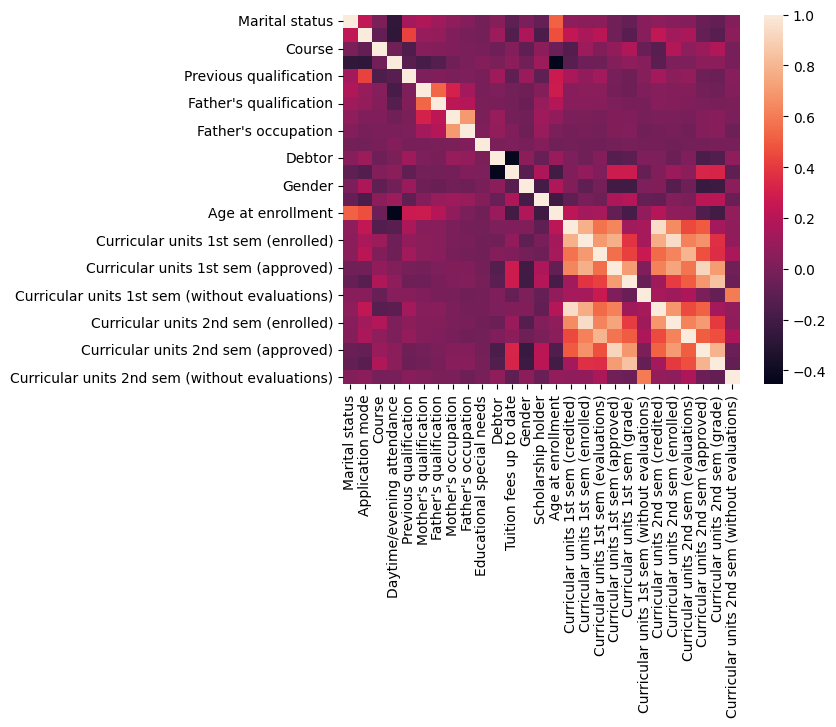

In [246]:
sns.heatmap(features.corr())

In [247]:
correlation = features.corrwith(target).abs().sort_values(ascending=False)
top5Correlation = correlation[:5]
print(top5Correlation)

Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Tuition fees up to date                0.442138
dtype: float64


# Logistic Regression

In [248]:
#importing ml stuff
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report, confusion_matrix

In [249]:
df.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
0               1                 8       2                           1   
1               1                 6      11                           1   
2               1                 1       5                           1   
3               1                 8      15                           1   
4               2                12       3                           0   

   Previous qualification  Mother's qualification  Father's qualification  \
0                       1                      13                      10   
1                       1                       1                       3   
2                       1                      22                      27   
3                       1                      23                      27   
4                       1                      22                      28   

   Mother's occupation  Father's occupation  Educational special needs  \
0                    6                   10                          0   
1                    4                    4                          0   
2                   10                   10                          0   
3                    6                    4                          0   
4                   10                   10                          0   

   Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0       0                        1       1                   0   
1       0                        0       1                   0   
2       0                        0       1                   0   
3       0                        1       0                   0   
4       0                        1       0                   0   

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1              

In [250]:
#training the model
y=df["Target"]
y=y.astype('int')
x_df = df[['Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Tuition fees up to date']]
X=x_df.iloc[:,:-1]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

model = LogisticRegression()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    model.fit(X=X_train, y=y_train)
    
y_pred = model.predict(X_test)


cel = log_loss(y_test, y_pred)

print("Cross entropy loss:",cel)

y_pred = model.predict(X_test)

# Add predicted values as new column to X_test dataframe
X_test['Predicted'] = y_pred

# Print X_test to verify that predicted values were added
X_test.head()

Cross entropy loss: 4.614709230647109


Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
200                                     4                         14.333333   
1869                                    3                         12.666667   
958                                     5                         12.666667   
2043                                    6                         12.166667   
4205                                    6                         13.533333   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
200                                     4                         13.750000   
1869                                    6                         11.666667   
958                                     5                         13.200000   
2043                                    6                         12.500000   
4205                                    6                         13.533333   

      Predicted  
200           0  
1869          1  
958           0  
2043          0  
4205          0

In [251]:
df_new = pd.merge(df, X_test['Predicted'], how = 'left',left_index = True, right_index = True)
df_new.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
0               1                 8       2                           1   
1               1                 6      11                           1   
2               1                 1       5                           1   
3               1                 8      15                           1   
4               2                12       3                           0   

   Previous qualification  Mother's qualification  Father's qualification  \
0                       1                      13                      10   
1                       1                       1                       3   
2                       1                      22                      27   
3                       1                      23                      27   
4                       1                      22                      28   

   Mother's occupation  Father's occupation  Educational special needs  \
0                    6                   10                          0   
1                    4                    4                          0   
2                   10                   10                          0   
3                    6                    4                          0   
4                   10                   10                          0   

   Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0       0                        1       1                   0   
1       0                        0       1                   0   
2       0                        0       1                   0   
3       0                        1       0                   0   
4       0                        1       0                   0   

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1              

In [264]:
df_prepro = df_new[df_new['Predicted'].notna()]

In [265]:
df_prepro.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
3                1                 8      15                           1   
4                2                12       3                           0   
6                1                 1      12                           1   
7                1                 9      11                           1   
10               1                 1      14                           1   

    Previous qualification  Mother's qualification  Father's qualification  \
3                        1                      23                      27   
4                        1                      22                      28   
6                        1                      13                      28   
7                        1                      22                      27   
10                       1                      23                      14   

    Mother's occupation  Father's occupation  Educational special needs  \
3                     6                    4                          0   
4                    10                   10                          0   
6                     8                   11                          0   
7                    10                   10                          0   
10                    6                    8                          0   

    Debtor  Tuition fees up to date  Gender  Scholarship holder  \
3        0                        1       0                   0   
4        0                        1       0                   0   
6        0                        1       0                   1   
7        0                        0       1                   0   
10       0                        1       0                   0   

    Age at enrollment  Curricular units 1st sem (credited)  \
3                  20                                    0   
4                  45                                    0   
6                  18                                    0   
7                  22                                    0   
10                 18                                    0   

    Curricular units 1st sem (enrolled)  \
3                                     6   
4                                     6   
6                                     7   
7                                     5   
10                                    6   

    Curricular units 1st sem (evaluations)  \
3                                        8   
4                                        9   
6                                        9   
7                                        5   
10                                       6   

    Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
3                                     6                         13.428571   
4                                     5                         12.333333   
6                                     7                         13.300000   
7                                     0                          0.000000   
10                                    6                         12.333333   

    Curricular units 1st sem (without evaluations)  \
3                                                0   
4                                                0   
6                                                0   
7                                                0   
10                                               0   

    Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
3                                     0                                    6   
4                                     0                                    6   
6                                     0                                    8   
7                                     0                                    5   
10                                    0                                    6   

    Curricular units 2nd sem (evaluations)  \


In [272]:
df_prepro.columns = df_prepro.columns.str.replace('Target', 'label_value')
df_prepro.columns = df_prepro.columns.str.replace('Predicted', 'score')
df_prepro.columns = df_prepro.columns.str.replace("Mother's qualification", 'Mother qualification')
df_prepro.columns = df_prepro.columns.str.replace("Father's qualification", 'Father qualification')
df_prepro.columns = df_prepro.columns.str.replace("Mother's occupation", 'Mother occupation')
df_prepro.columns = df_prepro.columns.str.replace("Father's occupation", 'Father occupation')
# df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (credited)", "Credited units sem1")
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 1st sem (enrolled)', 'Enrolled units sem1')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 1st sem (evaluations)', 'Eval units sem1')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 1st sem (approved)', 'Approved units sem1')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 1st sem (grade)', 'Grade units sem1')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 1st sem (without evaluations)', 'No Eval units sem1')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (credited)', 'Credited units sem2')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (enrolled)', 'Enrolled units sem2')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (evaluations)', 'Eval units sem2')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (approved)', 'Approved units sem2')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (grade)', 'Grade units sem2')
# df_prepro.columns = df_prepro.columns.str.replace('Curricular units 2nd sem (without evaluations)', 'No Eval units sem2')
df_prepro.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
3                1                 8      15                           1   
4                2                12       3                           0   
6                1                 1      12                           1   
7                1                 9      11                           1   
10               1                 1      14                           1   

    Previous qualification  Mother qualification  Father qualification  \
3                        1                    23                    27   
4                        1                    22                    28   
6                        1                    13                    28   
7                        1                    22                    27   
10                       1                    23                    14   

    Mother occupation  Father occupation  Educational special needs  Debtor  \
3                   6                  4                          0       0   
4                  10                 10                          0       0   
6                   8                 11                          0       0   
7                  10                 10                          0       0   
10                  6                  8                          0       0   

    Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
3                         1       0                   0                 20   
4                         1       0                   0                 45   
6                         1       0                   1                 18   
7                         0       1                   0                 22   
10                        1       0                   0                 18   

    Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
3                                     0                                    6   
4                                     0                                    6   
6                                     0                                    7   
7                                     0                                    5   
10                                    0                                    6   

    Curricular units 1st sem (evaluations)  \
3                                        8   
4                                        9   
6                                        9   
7                                        5   
10                                       6   

    Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
3                                     6                         13.428571   
4                                     5                         12.333333   
6                                     7                         13.300000   
7                                     0                          0.000000   
10                                    6                         12.333333   

    Curricular units 1st sem (without evaluations)  \
3                                                0   
4                                                0   
6                                                0   
7                                                0   
10                                               0   

    Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
3                                     0                                    6   
4                                     0                                    6   
6                                     0                                    8   
7                                     0                                    5   
10                                    0                                    6   

    Curricular units 2nd sem (evaluations)  \
3                                       10   
4                                      

In [277]:
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (credited)", "Credited units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (enrolled)", "Enrolled units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (evaluations)", "Eval units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (approved)", "Approved units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (grade)", "Grade units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 1st sem (without evaluations)", "No Eval units sem1", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (credited)", "Credited units sem2", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (enrolled)", "Enrolled units sem2", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (evaluations)", "Eval units sem2", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (approved)", "Approved units sem2", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (grade)", "Grade units sem2", regex=False)
df_prepro.columns = df_prepro.columns.str.replace("Curricular units 2nd sem (without evaluations)", "No Eval units sem2", regex=False)
df_prepro.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
3                1                 8      15                           1   
4                2                12       3                           0   
6                1                 1      12                           1   
7                1                 9      11                           1   
10               1                 1      14                           1   

    Previous qualification  Mother qualification  Father qualification  \
3                        1                    23                    27   
4                        1                    22                    28   
6                        1                    13                    28   
7                        1                    22                    27   
10                       1                    23                    14   

    Mother occupation  Father occupation  Educational special needs  Debtor  \
3                   6                  4                          0       0   
4                  10                 10                          0       0   
6                   8                 11                          0       0   
7                  10                 10                          0       0   
10                  6                  8                          0       0   

    Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
3                         1       0                   0                 20   
4                         1       0                   0                 45   
6                         1       0                   1                 18   
7                         0       1                   0                 22   
10                        1       0                   0                 18   

    Credited units sem1  Enrolled units sem1  Eval units sem1  \
3                     0                    6                8   
4                     0                    6                9   
6                     0                    7                9   
7                     0                    5                5   
10                    0                    6                6   

    Approved units sem1  Grade units sem1  No Eval units sem1  \
3                     6         13.428571                   0   
4                     5         12.333333                   0   
6                     7         13.300000                   0   
7                     0          0.000000                   0   
10                    6         12.333333                   0   

    Credited units sem2  Enrolled units sem2  Eval units sem2  \
3                     0                    6               10   
4                     0                    6                6   
6                     0                    8                8   
7                     0                    5                5   
10                    0                    6                7   

    Approved units sem2  Grade units sem2  No Eval units sem2  label_value  \
3                     5            12.400                   0            0   
4                     6            13.000                   0            0   
6                     8            14.345                   0            0   
7                     0             0.000                   0            1   
10                    5            14.200                   0            0   

    score  
3     0.0  
4     0.0  
6     0.0  
7     1.0  
10    0.0

# Preparing for using Aequitas - Proprocessing 

### Preparing by running preprocessing step of input dataframe.

In [278]:
# df_prepro['categorical_column_name'] = df_prepro['categorical_column_name'].astype(str)
df_ae, _ = preprocess_input_df(df_prepro)

/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/aequitas/preprocessing.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = bins.map(lambda x: '%0.2f' % values[x] + '-' + '%0.2f' % values[x + 1])


In [279]:
from aequitas.plotting import Plot

# Using Aequitas Group() Class

### The `group()` class allows us to evaluate biases across all subgroups by creating a confusion matrix. We also implement `.get_crosstabs()` in order to tabulate our confusion matrix. 

In [280]:
g = Group()
xtab, _ = g.get_crosstabs(df_ae)

/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### We also use `.list_absolute_metrics()` to quickly slice and view counts and bias metrics.

In [281]:
absolute_metrics = g.list_absolute_metrics(xtab)

## Displaying calculated counts across sample population groups

In [282]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]
xtab.head()

model_id score_threshold    k    attribute_name attribute_value       tpr  \
0         0      binary 0/1  225    Marital status       1.00-5.00  0.730216   
1         0      binary 0/1  225  Application mode       1.00-8.00  0.716312   
2         0      binary 0/1  225  Application mode     12.00-17.00  0.590909   
3         0      binary 0/1  225  Application mode      8.00-12.00  0.817204   
4         0      binary 0/1  225            Course     11.00-13.00  0.648649   

        tnr       for       fdr       fpr       fnr       npv  precision   pp  \
0  0.950893  0.149701  0.097778  0.049107  0.269784  0.850299   0.902222  225   
1  0.942249  0.114286  0.158333  0.057751  0.283688  0.885714   0.841667  120   
2  0.968254  0.227848  0.071429  0.031746  0.409091  0.772152   0.928571   28   
3  0.982143  0.236111  0.012987  0.017857  0.182796  0.763889   0.987013   77   
4  0.991870  0.096296  0.040000  0.008130  0.351351  0.903704   0.960000   25   

    pn       ppr     pprev  fp  fn   tn   tp  group_label_pos  \
0  501  1.000000  0.309917  22  75  426  203              278   
1  350  0.533333  0.255319  19  40  310  101              141   
2   79  0.124444  0.261682   2  18   61   26               44   
3   72  0.342222  0.516779   1  17   55   76               93   
4  135  0.111111  0.156250   1  13  122   24               37   

   group_label_neg  group_size  total_entities      prev  
0              448         726             726  0.382920  
1              329         470             726  0.300000  
2               63         107             726  0.411215  
3               56         149             726  0.624161  
4              123         160             726  0.231250

## Displaying calculated absolute metrics for each sample population group

In [283]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# xtab

attribute_name attribute_value   tpr   tnr   for   fdr   fpr  \
0               Marital status       1.00-5.00  0.73  0.95  0.15  0.10  0.05   
1             Application mode       1.00-8.00  0.72  0.94  0.11  0.16  0.06   
2             Application mode     12.00-17.00  0.59  0.97  0.23  0.07  0.03   
3             Application mode      8.00-12.00  0.82  0.98  0.24  0.01  0.02   
4                       Course     11.00-13.00  0.65  0.99  0.10  0.04  0.01   
5                       Course     13.00-17.00  0.67  0.98  0.18  0.04  0.02   
6                       Course       2.00-6.00  0.69  0.85  0.20  0.25  0.15   
7                       Course      6.00-11.00  0.84  0.98  0.13  0.02  0.02   
8   Daytime/evening attendance       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
9       Previous qualification      1.00-17.00  0.73  0.95  0.15  0.10  0.05   
10        Mother qualification      1.00-13.00  0.69  0.94  0.15  0.14  0.06   
11        Mother qualification     13.00-22.00  0.78  0.96  0.21  0.04  0.04   
12        Mother qualification     22.00-26.00  0.81  0.99  0.05  0.06  0.01   
13        Father qualification       1.00-2.00  0.68  0.93  0.18  0.14  0.07   
14        Father qualification     14.00-27.00  0.77  0.97  0.18  0.04  0.03   
15        Father qualification      2.00-14.00  0.76  0.93  0.12  0.15  0.07   
16        Father qualification     27.00-33.00  0.65  0.98  0.12  0.09  0.02   
17           Mother occupation       1.00-5.00  0.76  0.93  0.14  0.12  0.07   
18           Mother occupation     10.00-29.00  0.79  1.00  0.20  0.00  0.00   
19           Mother occupation       5.00-6.00  0.53  0.95  0.24  0.13  0.05   
20           Mother occupation      6.00-10.00  0.76  0.96  0.12  0.08  0.04   
21           Father occupation       1.00-5.00  0.75  0.93  0.19  0.10  0.07   
22           Father occupation     10.00-46.00  0.80  0.91  0.14  0.13  0.09   
23           Father occupation       5.00-8.00  0.70  0.96  0.13  0.10  0.04   
24           Father occupation      8.00-10.00  0.71  0.96  0.15  0.08  0.04   
25   Educational special needs       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
26                      Debtor       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
27     Tuition fees up to date       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
28                      Gender       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
29          Scholarship holder       0.00-1.00  0.73  0.95  0.15  0.10  0.05   
30           Age at enrollment     18.00-20.00  0.70  0.95  0.09  0.19  0.05   
31           Age at enrollment     20.00-25.00  0.73  0.93  0.20  0.10  0.07   
32           Age at enrollment     25.00-62.00  0.76  1.00  0.35  0.00  0.00   
33         Credited units sem1      0.00-19.00  0.73  0.95  0.15  0.10  0.05   
34         Enrolled units sem1       0.00-6.00  0.80  0.92  0.15  0.11  0.08   
35         Enrolled units sem1       6.00-7.00  0.64  0.99  0.15  0.04  0.01   
36         Enrolled units sem1      7.00-21.00  0.19  1.00  0.15  0.00  0.00   
37             Eval units sem1       0.00-6.00  0.91  0.85  0.08  0.16  0.15   
38             Eval units sem1     10.00-33.00  0.63  0.96  0.28  0.06  0.04   
39             Eval units sem1       6.00-8.00  0.58  0.99  0.10  0.06  0.01   
40             Eval units sem1      8.00-10.00  0.68  1.00  0.21  0.00  0.00   
41         Approved units sem1       0.00-3.00  0.94  0.25  0.65  0.09  0.75   
42         Approved units sem1       3.00-6.00  0.36  0.99  0.15  0.10  0.01   
43         Approved units sem1      6.00-21.00  0.12  0.99  0.10  0.33  0.01   
44            Grade units sem1      0.00-11.00  0.96  0.54  0.23  0.10  0.46   
45            Grade units sem1     11.00-12.50  0.51  0.97  0.24  0.07  0.03   
46            Grade units sem1     12.50-13.50  0.45  0.99  0.11  0.12  0.01   
47            Grade units sem1     13.50-18.00  0.29  1.00  0.09  0.00  0.00   
48          No Eval units sem1      0.00-12.00  0.73  0.95  0.15  0.10  0.05   
49         Credi

# Using Aequitas Bias() Class

### Using the Bias() class calculates the disparities between groups based on the crosstab produced above.

In [284]:
b = Bias()

## Disparities calculated for each attribute by user specified groups

### Displayed below, we are implementing the `.get_disparity_predefined_groups()` function which allows us to define a base group for each attribute.

In [285]:

ref_groups_dict = {"Marital status":'1.00-5.00', "Application mode":'12.00-17.00', 'Course':'11.00-13.00', "Daytime/evening attendance":'0.00-1.00', "Previous qualification":'1.00-17.00', "Mother qualification":'1.00-13.00', "Father qualification":'1.00-2.00', "Mother occupation":'1.00-5.00', "Father occupation":'1.00-5.00', "Educational special needs":'0.00-1.00', 'Debtor':'0.00-1.00', "Tuition fees up to date":'0.00-1.00', 'Gender':'0.00-1.00', "Scholarship holder":'0.00-1.00', "Age at enrollment":'18.00-20.00', "Credited units sem1":'0.00-19.00', "Enrolled units sem1":'0.00-6.00', "Eval units sem1":'6.00-8.00', "Approved units sem1":'0.00-3.00', "Grade units sem1":'0.00-11.00', "No Eval units sem1":'0.00-12.00', "Credited units sem2":'0.00-13.00', "Enrolled units sem2":'6.00-8.00', "Eval units sem2":'10.00-33.00', "Approved units sem2":'2.00-5.00', "Grade units sem2":'0.00-10.67', "No Eval units sem2":'0.00-12.00'}

bdf = b.get_disparity_predefined_groups(df=xtab, original_df = df_ae,
                                            ref_groups_dict = ref_groups_dict,
                                            alpha=0.05, check_significance=True,
                                            mask_significance=True)
bdf.style


get_disparity_predefined_group()
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [330]:
ref_groups_dict_2 = {"Marital status":'1.00-5.00', "Application mode":'12.00-17.00', 'Course':'11.00-13.00', "Daytime/evening attendance":'0.00-1.00', "Previous qualification":'1.00-17.00', "Mother qualification":'1.00-13.00', "Father qualification":'1.00-2.00', "Mother occupation":'1.00-5.00', "Father occupation":'1.00-5.00', "Educational special needs":'0.00-1.00', 'Debtor':'0.00-1.00', "Tuition fees up to date":'0.00-1.00', 'Gender':'0.00-1.00', "Scholarship holder":'0.00-1.00', "Age at enrollment":'18.00-20.00', "Credited units sem1":'0.00-19.00', "Enrolled units sem1":'0.00-6.00', "Eval units sem1":'6.00-8.00', "Approved units sem1":'3.00-6.00', "Grade units sem1":'0.00-11.00', "No Eval units sem1":'0.00-12.00', "Credited units sem2":'0.00-13.00', "Enrolled units sem2":'6.00-8.00', "Eval units sem2":'10.00-33.00', "Approved units sem2":'2.00-5.00', "Grade units sem2":'0.00-10.67', "No Eval units sem2":'0.00-12.00'}

bdf_2 = b.get_disparity_predefined_groups(df=xtab, original_df = df_ae,
                                            ref_groups_dict = ref_groups_dict_2,
                                            alpha=0.05, check_significance=True,
                                            mask_significance=True)
bdf_2.style

get_disparity_predefined_group()
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [334]:
ref_groups_dict_3 = {"Marital status":'1.00-5.00', "Application mode":'12.00-17.00', 'Course':'11.00-13.00', "Daytime/evening attendance":'0.00-1.00', "Previous qualification":'1.00-17.00', "Mother qualification":'1.00-13.00', "Father qualification":'1.00-2.00', "Mother occupation":'1.00-5.00', "Father occupation":'1.00-5.00', "Educational special needs":'0.00-1.00', 'Debtor':'0.00-1.00', "Tuition fees up to date":'0.00-1.00', 'Gender':'0.00-1.00', "Scholarship holder":'0.00-1.00', "Age at enrollment":'18.00-20.00', "Credited units sem1":'0.00-19.00', "Enrolled units sem1":'0.00-6.00', "Eval units sem1":'6.00-8.00', "Approved units sem1":'6.00-21.00', "Grade units sem1":'0.00-11.00', "No Eval units sem1":'0.00-12.00', "Credited units sem2":'0.00-13.00', "Enrolled units sem2":'6.00-8.00', "Eval units sem2":'10.00-33.00', "Approved units sem2":'2.00-5.00', "Grade units sem2":'0.00-10.67', "No Eval units sem2":'0.00-12.00'}

bdf_3 = b.get_disparity_predefined_groups(df=xtab, original_df = df_ae,
                                            ref_groups_dict = ref_groups_dict_3,
                                            alpha=0.05, check_significance=True,
                                            mask_significance=True)
bdf_3.style

get_disparity_predefined_group()
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


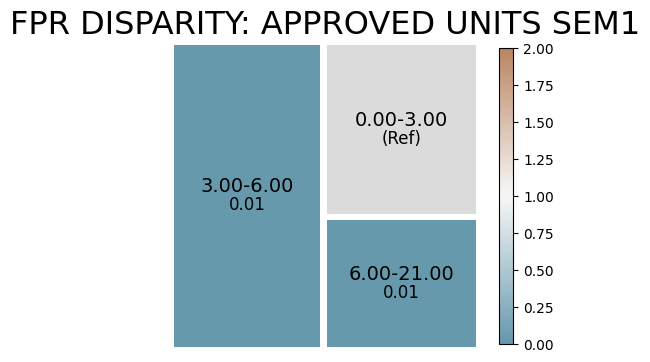

In [286]:
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='Approved units sem1', significance_alpha=0.05)

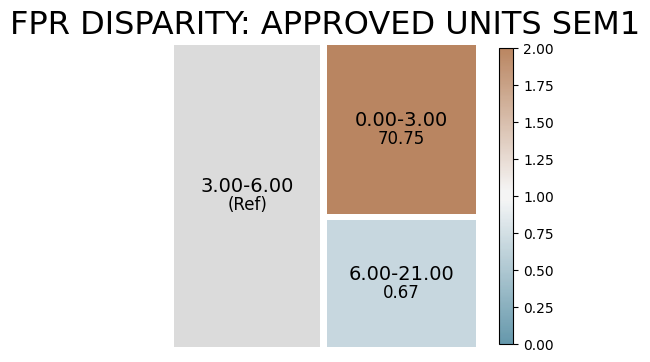

In [331]:
aqp.plot_disparity(bdf_2, group_metric='fpr_disparity', attribute_name='Approved units sem1', significance_alpha=0.05)

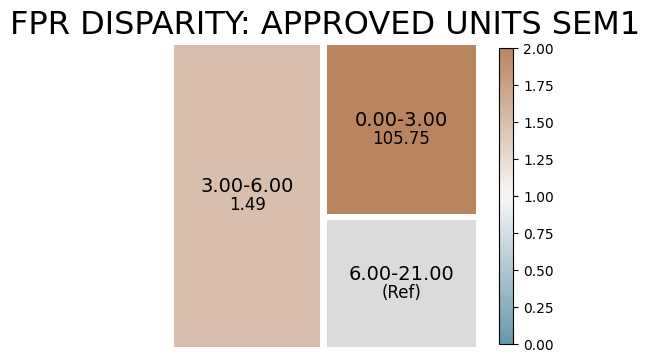

In [335]:
aqp.plot_disparity(bdf_3, group_metric='fpr_disparity', attribute_name='Approved units sem1', significance_alpha=0.05)

get_disparity_major_group()


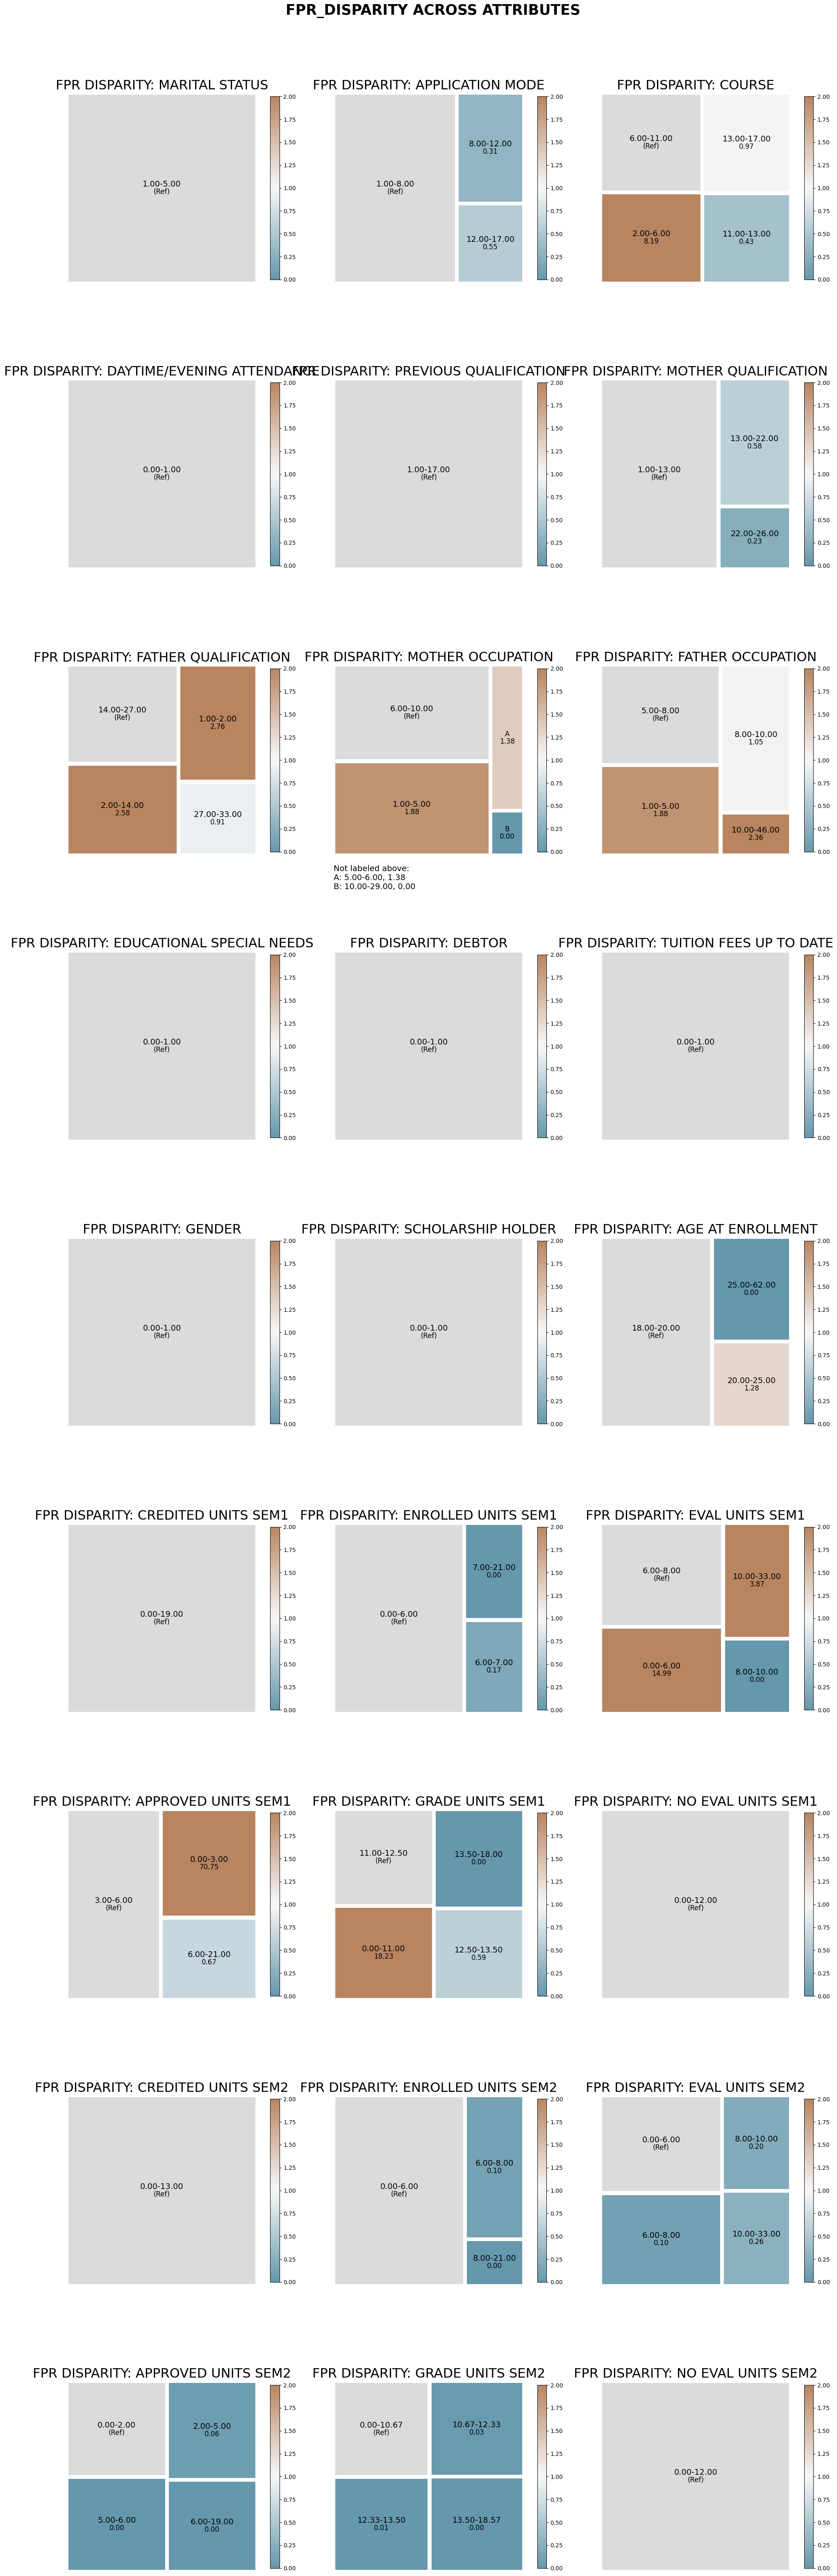

In [287]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df_ae, mask_significance=True)
j = aqp.plot_disparity_all(majority_bdf, metrics=['fpr_disparity'], significance_alpha=0.05)

In [288]:
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

In [289]:
xtab_short = xtab.drop([0,1,2,3,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31,32,33,34,35,36,48,49,50,51,52,65])

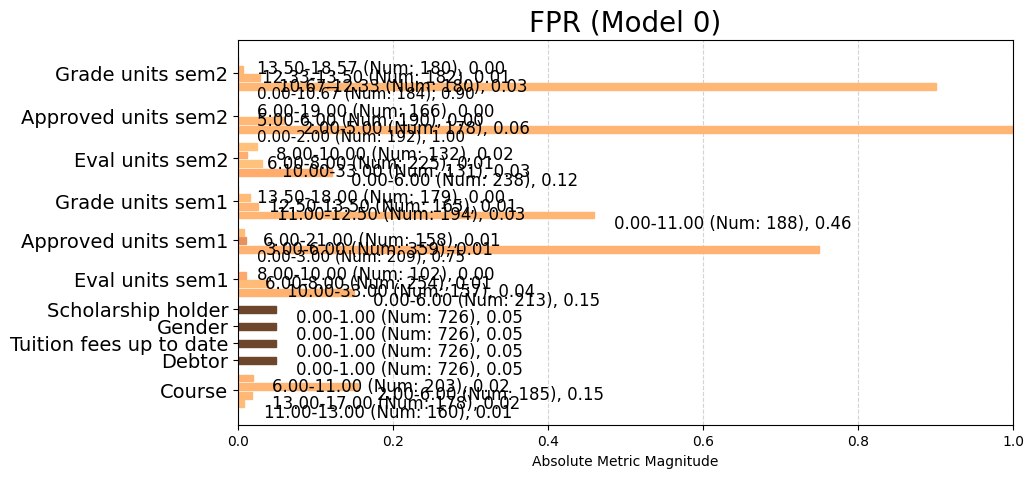

In [337]:
fnr = aqp.plot_group_metric(xtab_short, 'fpr')

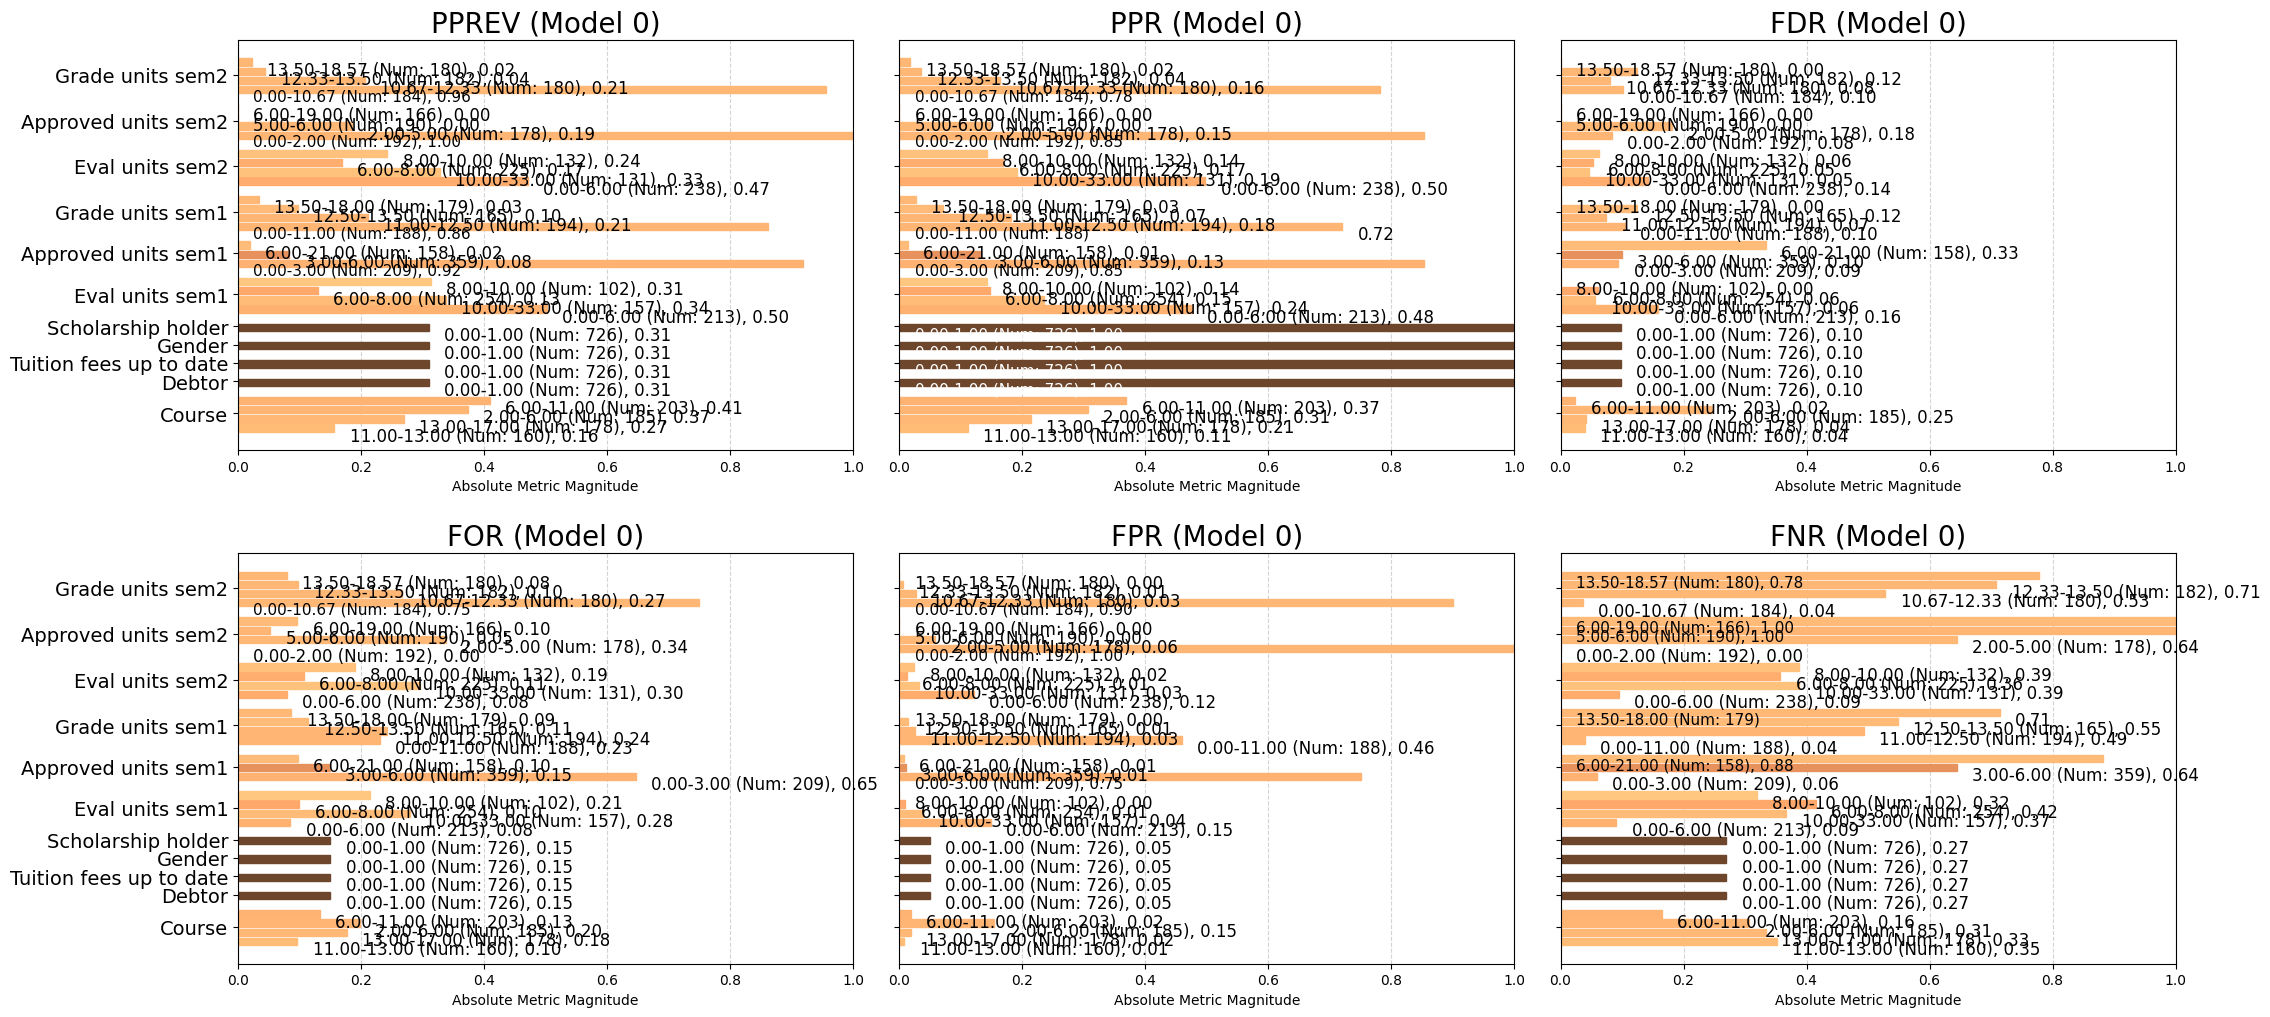

<Figure size 640x480 with 0 Axes>

In [291]:
a = aqp.plot_group_metric_all(xtab_short, ncols=3)

In [292]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

## Displaying/Checking Disparities in Course

In [293]:
ap.disparity(bdf, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Displaying/Checking how fairness threshold maps to the absolute values of each metric

In [294]:
ap.absolute(bdf, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Displaying/Checking Disparities in Curricular Units 1st Sem (Approved)

In [295]:
ap.disparity(bdf, metrics, 'Approved units sem1', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

## Displaying/Checking how fairness threshold maps to the absolute values of each metric

In [296]:
ap.absolute(bdf, metrics, 'Approved units sem1', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### `.get_disparity_major_group()` automates base group selection based on sample majority (across each attribute)

In [297]:
bd = b.get_disparity_major_group(xtab, original_df=df_ae , key_columns=None, input_group_metrics=None, fill_divbyzero=None, check_significance=None, alpha=0.05, mask_significance=True)

bd.style

get_disparity_major_group()


In [298]:
bd[['attribute_name', 'attribute_value'] +
     b.list_disparities(bd) + b.list_significance(bd)].style

In [299]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [300]:
ap.disparity(bd, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [301]:
ap.absolute(bd, metrics, 'Course', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [302]:
ap.disparity(bd, metrics, 'Approved units sem1', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [303]:
ap.absolute(bd, metrics, 'Approved units sem1', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

### `get_disparity_min_metric()` automates base group selection based on sample majority (across each attribute) and minimum value for each calculated bias metric.

In [304]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df_ae,
                                            check_significance=True)
min_metric_bdf.style

get_disparity_min_metric()
/Users/ashleykim/Library/Python/3.7/lib/python/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


# Using Aequitas Fairness() 

### The `Fairness()` class quickly returns a list of fairness determinations

In [305]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [306]:
parity_detrminations = f.list_parities(fdf)

In [307]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + b.list_disparities(fdf) + parity_detrminations].style

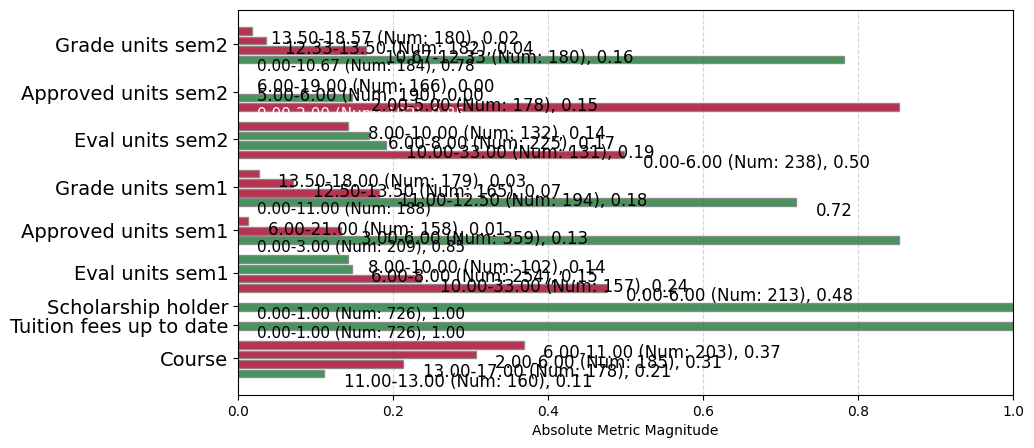

In [328]:
fdf_short = fdf.drop([0,1,2,3,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34,35,36,48,49,50,51,52,65])

z = aqp.plot_fairness_group(fdf_short, group_metric='ppr')

# plt.figure(figsize = (10, 20))
# def cm_to_inch(value):
#     return value/2.54
# plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
# z = aqp.plot_fairness_group(fdf, group_metric='ppr', ax=z., ax_lim=None, title=False, label_dict=None, min_group_size=None)

### Plotting fairness/parity of each group

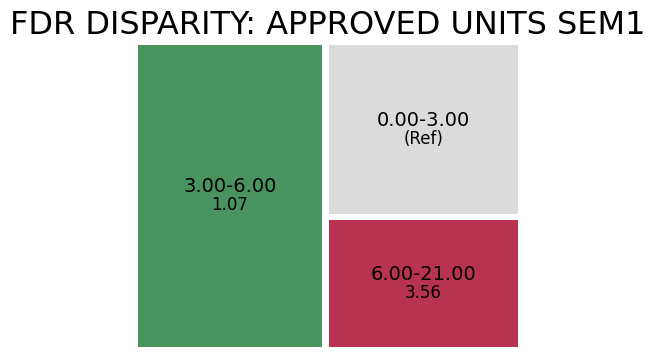

In [338]:
aqp.plot_fairness_disparity(fdf, group_metric = 'fdr_disparity', attribute_name = 'Approved units sem1', ax=None, fig=None, title=True, min_group_size=None, significance_alpha=0.05)


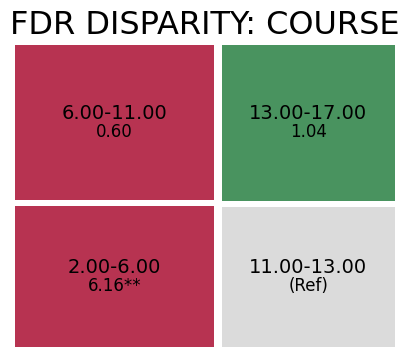

In [339]:
aqp.plot_fairness_disparity(fdf, group_metric = 'fdr_disparity', attribute_name = 'Course', ax=None, fig=None, title=True, min_group_size=None, significance_alpha=0.05)

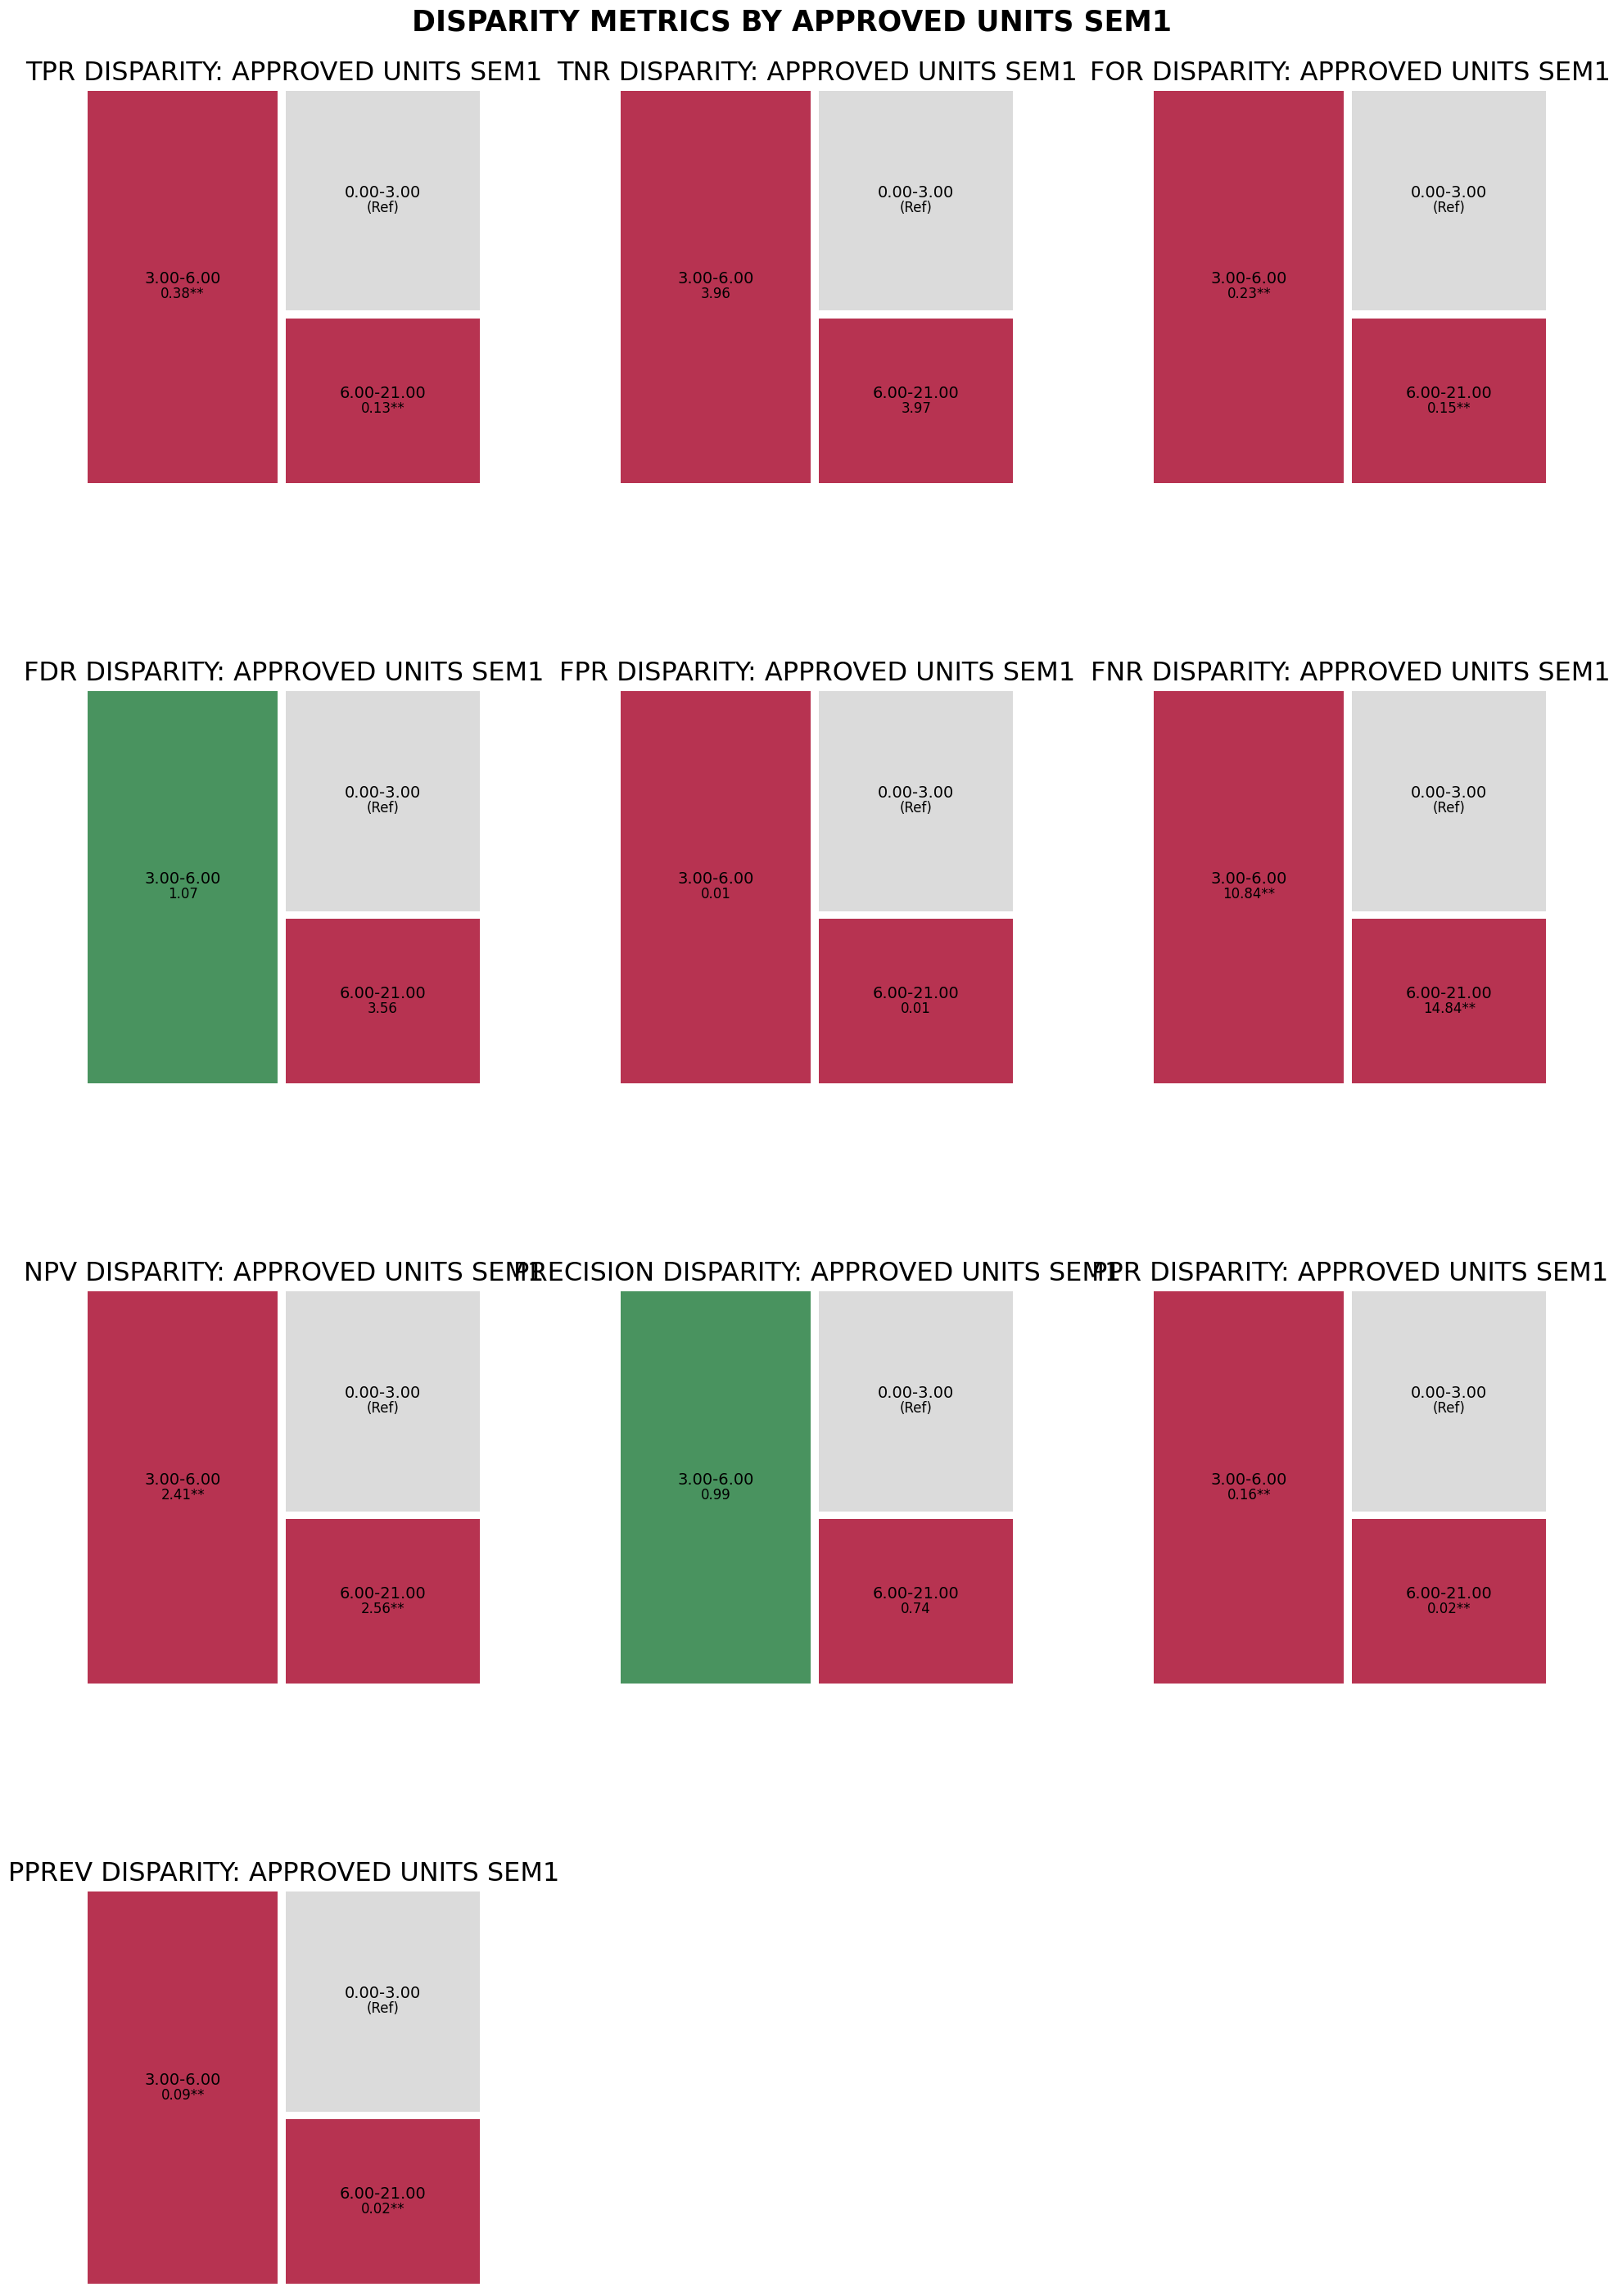

In [310]:
a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['Approved units sem1'], metrics='all',
                                       significance_alpha=0.05)

### Showing fainess disparities focused on the column: "Approved Units Sem1"

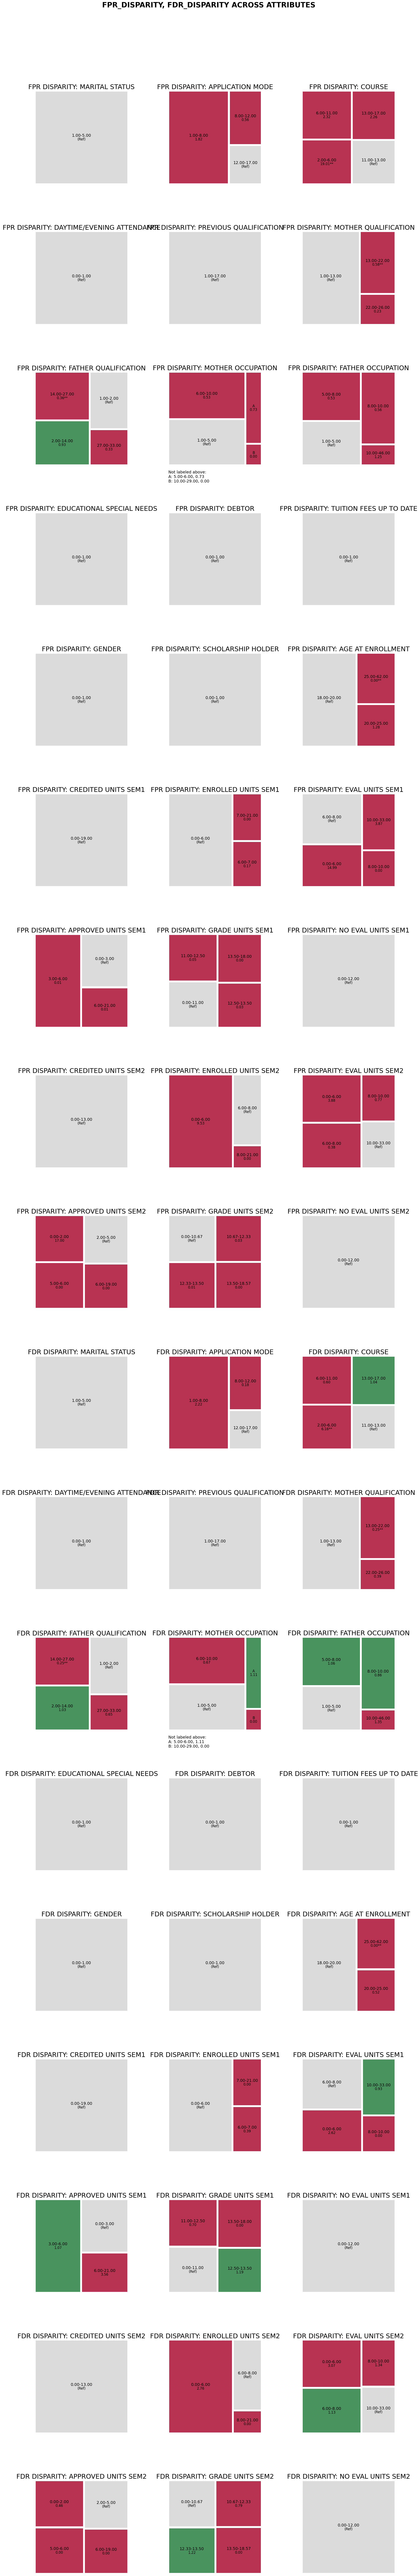

In [315]:
r_tm = aqp.plot_fairness_disparity_all(fdf, metrics=['fpr_disparity', 'fdr_disparity'],
                                       significance_alpha=0.05)

### Showing fpr and fdr disparities for all columns

## Attribute Level Fairness

### Determines whether the minimum value for each fairness measure in fair_measures_requested is ‘False’ across all attribute_values defined by a group attribute_name. If ‘False’ is present, determination for the attribute is False for given fairness measure.

In [313]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

model_id score_threshold              attribute_name  Statistical Parity  \
0          0      binary 0/1           Age at enrollment               False   
1          0      binary 0/1            Application mode               False   
2          0      binary 0/1         Approved units sem1               False   
3          0      binary 0/1         Approved units sem2               False   
4          0      binary 0/1                      Course               False   
5          0      binary 0/1         Credited units sem1                True   
6          0      binary 0/1         Credited units sem2                True   
7          0      binary 0/1  Daytime/evening attendance                True   
8          0      binary 0/1                      Debtor                True   
9          0      binary 0/1   Educational special needs                True   
10         0      binary 0/1         Enrolled units sem1               False   
11         0      binary 0/1         Enrolled units sem2               False   
12         0      binary 0/1             Eval units sem1               False   
13         0      binary 0/1             Eval units sem2               False   
14         0      binary 0/1           Father occupation               False   
15         0      binary 0/1        Father qualification               False   
16         0      binary 0/1                      Gender                True   
17         0      binary 0/1            Grade units sem1               False   
18         0      binary 0/1            Grade units sem2               False   
19         0      binary 0/1              Marital status                True   
20         0      binary 0/1           Mother occupation               False   
21         0      binary 0/1        Mother qualification               False   
22         0      binary 0/1          No Eval units sem1                True   
23         0      binary 0/1          No Eval units sem2                True   
24         0      binary 0/1      Previous qualification                True   
25         0      binary 0/1          Scholarship holder                True   
26         0      binary 0/1     Tuition fees up to date                True   

    Impact Parity  FDR Parity  FPR Parity  FOR Parity  FNR Parity  TPR Parity  \
0           False       False       False       False       False        True   
1           False       False       False       False       False       False   
2           False       False       False       False       False       False   
3           False       False       False       False       False       False   
4           False       False       False       False       False       False   
5            True        True        True        True        True        True   
6            True        True        True        True        True        True   
7            True        True        True        True        True        True   
8            True        True        True        True        True        True   
9            True        True        True        True        True        True   
10          False       False       False        True       False       False   
11          False       False       False       False       False       False   
12          False       False       False       False       False       False   
13          False       False       False       False       False       False   
14          False       False       False       False        True        True   
15          False       False       False       False       False        True   
16           True        True        True        True        True        True   
17          False       False       False       False       False       False   
18          False       False       False       False       False       False   
19           True        True        True        True        True        True   
20          False       False       False       False       Fa

## Overall Fairness

### Finding overall fairness regardless of the group_attributes. Searches for ‘False’ parity determinations across group_attributes and outputs ‘True’ determination if all group_attributes are fair.

In [314]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

### After generating overall fairness report, we can conclude that our dataset is unfair. 